# Proyek Analisis Data: Nama dataset
- Nama: Nabila Jauza Firjatullah
- Email: nabila060695@gmail.com
- Id Dicoding: billa_firza

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1: Pada cuaca seperti apa seseorang akan lebih sering menyewa sepeda untuk pergi bersepeda?
- Pertanyaan 2: Bagaimana peforma penyewaan sepeda selama tahun 2012?

## Menyiapkan semua library yang dibutuhkan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

## Data Wrangling

### Gathering Data

#### Membaca tabel `day_df` dari file `data/day.csv`

In [2]:
day_df = pd.read_csv("data/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


#### Membaca tabel `hour_df` dari file `data/hour.csv`

In [3]:
hour_df = pd.read_csv("data/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

#### Menilai tabel `day_df`

Cek tipe data dan setara atau tidaknya jumlah data pada tabel `day_df`

In [4]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Cek duplikasi nilai pada tabel `day_df`

In [5]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


Menampilkan ringkasan parameter statistik tabel `day_df`

In [6]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


#### Menilai tabel `hour_df`

Cek tipe data dan setara atau tidaknya jumlah data pada tabel `hour_df`

In [7]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Cek duplikasi nilai pada tabel `hour_df`

In [8]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


Menampilkan ringkasan parameter statistik tabel `hour_df`

In [9]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Cleaning Data

##### Membersihkan table `day_df`

Mengubah tipe data

In [10]:
datetime_columns = ["dteday"]

for column in datetime_columns:
  day_df[column] = pd.to_datetime(day_df[column])

Cek tipe data kolom `dteday` pada tabel `day_df` yang diubah 

In [11]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

Memperbaiki tampilan nilai `temp`, `atemp`, `hum`, dan `windspeed` sesuai keterangan yang ada dalam file txt dataset kali ini

In [12]:
day_df["temp"] = day_df["temp"] * 41

In [13]:
day_df["atemp"] = day_df["atemp"] * 50

In [14]:
day_df["hum"] = day_df["hum"] * 100

In [15]:
day_df["windspeed"] = day_df["windspeed"] * 67

Memeriksa perubahan nilai pada `temp`, `atemp`, `hum`, dan `windspeed` yang sudah dieksekusi

In [16]:
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


Memeriksa perubahan nilai pada parameter statisik

In [17]:
day_df.describe()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,20.310776,23.717699,62.789406,12.762576,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.820424,16.892125,52.000000,9.041650,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,20.431653,24.336650,62.666700,12.125325,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.872076,30.430100,73.020850,15.625371,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,7.505091,8.148059,14.242910,5.192357,686.622488,1560.256377,1937.211452


##### Membersihkan table `hour_df`

Mengubah tipe data

In [18]:
datetime_columns = ["dteday"]

for column in datetime_columns:
  hour_df[column] = pd.to_datetime(hour_df[column])

Cek tipe data kolom `dteday` pada tabel `hour_df` yang diubah 

In [19]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

Memperbaiki tampilan nilai `temp`, `atemp`, `hum`, dan `windspeed` sesuai keterangan yang ada dalam file txt dataset kali ini

In [20]:
hour_df["temp"] = hour_df["temp"] * 41

In [21]:
hour_df["atemp"] = hour_df["atemp"] * 41

In [22]:
hour_df["hum"] = hour_df["hum"] * 41

In [23]:
hour_df["windspeed"] = hour_df["windspeed"] * 41

Memeriksa perubahan nilai pada `temp`, `atemp`, `hum`, dan `windspeed` yang sudah dieksekusi

In [24]:
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,9.84,11.8039,33.21,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,9.02,11.1807,32.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,9.02,11.1807,32.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,9.84,11.8039,30.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,9.84,11.8039,30.75,0.0,0,1,1


Memeriksa perubahan nilai pada parameter statisik

In [25]:
hour_df.describe()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,20.376474,19.506779,25.716382,7.794002,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.820000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,13.940000,13.665300,19.680000,4.284500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,20.500000,19.876800,25.830000,7.954000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,27.060000,25.469200,31.980000,10.401700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,41.000000,41.000000,41.000000,34.878700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,7.894801,7.045859,7.910123,5.015949,49.305030,151.357286,181.387599


## Exploratory Data Analysis (EDA)

### Explore `day_df`

In [26]:
day_df.sample(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
198,199,2011-07-18,3,0,7,0,1,1,1,30.613347,35.19625,65.1250,14.458868,841,3617,4458
300,301,2011-10-28,4,0,10,0,5,1,2,13.564153,15.94060,58.5833,15.375093,456,3291,3747
336,337,2011-12-03,4,0,12,0,6,0,1,12.265847,15.53020,61.2917,6.417481,706,2908,3614
534,535,2012-06-18,2,1,6,0,1,1,2,23.301653,27.24210,77.7917,11.707982,653,4446,5099
305,306,2011-11-02,4,0,11,0,3,1,1,15.477500,19.50665,71.8750,5.500144,370,3816,4186


In [27]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,20.310776,23.717699,62.789406,12.762576,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.820424,16.892125,52.000000,9.041650,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,20.431653,24.336650,62.666700,12.125325,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.872076,30.430100,73.020850,15.625371,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,7.505091,8.148059,14.242910,5.192357,686.622488,1560.256377,1937.211452


In [28]:
day_df.groupby(by="weathersit").instant.nunique().sort_values(ascending=False)

weathersit
1    463
2    247
3     21
Name: instant, dtype: int64

In [29]:
day_df.loc[day_df['yr'] == 1].groupby(by="mnth").agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum",
})

,casual,registered,cnt
mnth,,,
1,8969,87775,96744
2,8721,94416,103137
3,31618,133257,164875
4,38456,135768,174224
5,44235,151630,195865
6,43294,159536,202830
7,41705,161902,203607
8,43197,171306,214503
9,43778,174795,218573


### Explore `hour_df`

In [30]:
hour_df.sample(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
14800,14801,2012-09-13,3,1,9,21,0,4,1,1,25.42,24.8501,26.65,4.2845,26,291,317
16935,16936,2012-12-13,4,1,12,10,0,4,1,1,13.12,12.4230,18.45,11.6276,28,139,167
7889,7890,2011-11-30,4,0,11,9,0,3,1,1,12.30,11.8039,30.75,11.6276,7,186,193
11462,11463,2012-04-27,2,1,4,19,0,5,1,1,20.50,19.8768,11.07,15.9121,62,379,441
9704,9705,2012-02-14,1,1,2,7,0,2,1,2,9.84,10.5616,24.60,3.6736,4,276,280


In [31]:
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,20.376474,19.506779,25.716382,7.794002,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.820000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,13.940000,13.665300,19.680000,4.284500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,20.500000,19.876800,25.830000,7.954000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,27.060000,25.469200,31.980000,10.401700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,41.000000,41.000000,41.000000,34.878700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,7.894801,7.045859,7.910123,5.015949,49.305030,151.357286,181.387599


In [32]:
hour_df.groupby(by="weathersit").instant.nunique().sort_values(ascending=False)

weathersit
1    11413
2     4544
3     1419
4        3
Name: instant, dtype: int64

## Visualization & Explanatory Analysis

###  Pertanyaan 1: Pada cuaca seperti apa seseorang akan lebih sering menyewa sepeda untuk pergi bersepeda? 

Berdasarkan cuaca tiap hari

In [33]:

byday_df = day_df.groupby(by="weathersit").instant.nunique().reset_index()
byday_df.rename(columns={
    "instant": "wths_count"
}, inplace=True)
byday_df

,weathersit,wths_count
0,1,463
1,2,247
2,3,21


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_23484\3004868058.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_23484\3004868058.py:4: UserWarning: The palette list has more values (5) than needed (3), which may not be intended.
  sns.barplot(


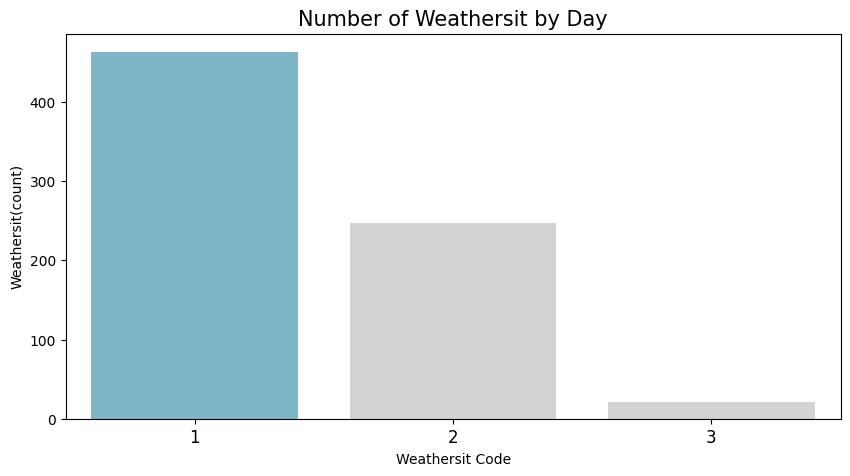

In [50]:
plt.figure(figsize=(10, 5))
colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(
    y="wths_count", 
    x="weathersit",
    data=byday_df.sort_values(by="wths_count", ascending=False),
    palette=colors
)
plt.title("Number of Weathersit by Day", loc="center", fontsize=15)
plt.ylabel('Weathersit(count)')
plt.xlabel('Weathersit Code')
plt.tick_params(axis='x', labelsize=12)
plt.show()

Berdasarkan cuaca tiap jam

In [35]:
byhour_df = hour_df.groupby(by="weathersit").instant.nunique().reset_index()
byhour_df.rename(columns={
    "instant": "wths_count"
}, inplace=True)
byhour_df

,weathersit,wths_count
0,1,11413
1,2,4544
2,3,1419
3,4,3


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_23484\3805587284.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_23484\3805587284.py:4: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  sns.barplot(


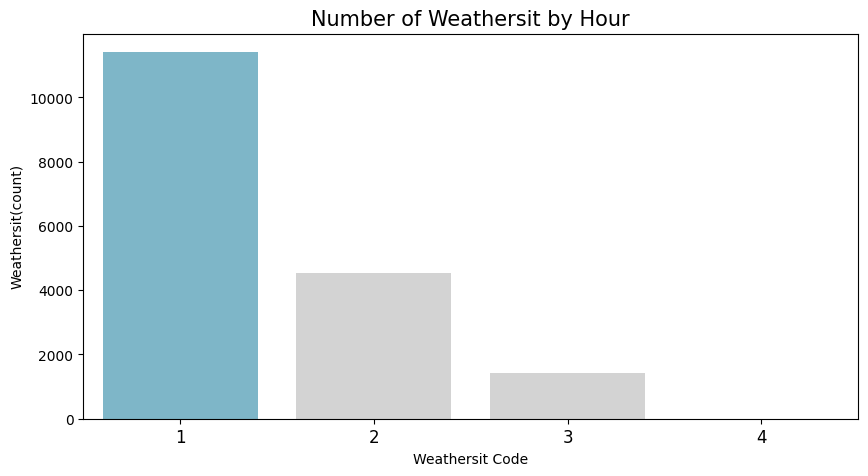

In [51]:
plt.figure(figsize=(10, 5))
colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(
    y="wths_count", 
    x="weathersit",
    data=byhour_df.sort_values(by="wths_count", ascending=False),
    palette=colors
)
plt.title("Number of Weathersit by Hour", loc="center", fontsize=15)
plt.ylabel('Weathersit(count)')
plt.xlabel('Weathersit Code')
plt.tick_params(axis='x', labelsize=12)
plt.show()

### Pertanyaan 2: Bagaimana peforma penyewaan sepeda selama tahun 2012?

In [37]:
rent_df = day_df.loc[day_df['yr'] == 1].groupby(by=["mnth"]).agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum",
})
rent_df

,casual,registered,cnt
mnth,,,
1,8969,87775,96744
2,8721,94416,103137
3,31618,133257,164875
4,38456,135768,174224
5,44235,151630,195865
6,43294,159536,202830
7,41705,161902,203607
8,43197,171306,214503
9,43778,174795,218573


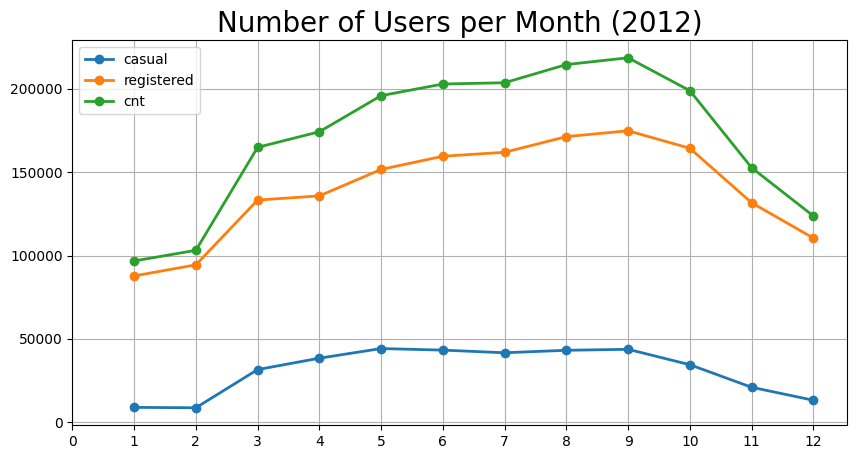

In [38]:
plt.figure(figsize=(10, 5))
plt.plot(
    rent_df["casual"],  
    marker='o', 
    linewidth=2,
    )
plt.plot(
    rent_df["registered"],
    marker='o', 
    linewidth=2,
    )
plt.plot(
    rent_df["cnt"],
    marker='o', 
    linewidth=2,
    )
plt.grid(True)
x = np.arange(0, 13, 1)
plt.xticks(x)
plt.legend(rent_df, loc=2)
plt.title("Number of Users per Month (2012)", loc="center", fontsize=20)
plt.show()

### Regression Analysis 

Menampilkan pivot tabel dari analisis regresi

In [47]:
# Memilih fitur-fitur yang akan digunakan dalam analisis regresi
features = ['temp', 'atemp', 'hum', 'windspeed', 'holiday', 'weathersit']

# Memisahkan variabel independen (X) dan dependen (y)
X = day_df[features]
y = day_df['cnt']

# Membagi data menjadi data pelatihan dan data pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inisialisasi model regresi linear
model = LinearRegression()

# Melatih model pada data pelatihan
model.fit(X_train, y_train)

# Membuat prediksi menggunakan data pengujian
y_pred = model.predict(X_test)

# Membuat DataFrame untuk menyimpan data aktual dan prediksi
result_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred, 'Residuals': y_test - y_pred})

# Menampilkan beberapa baris pertama dari DataFrame hasil
result_df


,Actual,Predicted,Residuals
703,6606,4531.243008,2074.756992
33,1550,2755.688894,-1205.688894
300,3747,3131.534236,615.465764
456,6041,3814.898072,2226.101928
633,7538,5131.402928,2406.597072
...,...,...,...
70,2132,3646.872122,-1514.872122
192,4258,6738.959985,-2480.959985
328,2792,4306.409669,-1514.409669
165,5180,5928.705512,-748.705512


Alur program di atas:

Memilih Fitur:
Dimulai dengan mendefinisikan fitur-fitur yang akan digunakan dalam analisis regresi. Dalam hal ini, fitur-fitur tersebut adalah 'temp' (temperatur), 'atemp' (temperatur yang dirasakan), 'hum' (kelembaban), 'windspeed' (kecepatan angin), 'holiday' (hari libur), dan 'weathersit' (kondisi cuaca).

Memisahkan Variabel Independen dan Dependen:
Variabel independen (X) adalah fitur-fitur yang telah dipilih, dan variabel dependen (y) adalah 'cnt' yang merupakan jumlah total sewa sepeda.

Membagi Data:
Data dibagi menjadi dua bagian, yaitu data pelatihan (80% dari data) dan data pengujian (20% dari data). Ini dilakukan dengan menggunakan fungsi train_test_split dari scikit-learn.

Inisialisasi dan Melatih Model:
Model regresi linear diinisialisasi menggunakan LinearRegression() dari scikit-learn. Model tersebut kemudian dilatih pada data pelatihan menggunakan fungsi fit(X_train, y_train).

Membuat Prediksi:
Setelah model dilatih, kita menggunakan data pengujian (X_test) untuk membuat prediksi jumlah sewa sepeda (y_pred) menggunakan fungsi predict.

Membuat DataFrame Hasil:
DataFrame result_df dibuat untuk menyimpan hasil analisis. Kolom-kolom DataFrame ini adalah 'Actual' (jumlah sewa sepeda aktual), 'Predicted' (jumlah sewa sepeda yang diprediksi oleh model), dan 'Residuals' (selisih antara actual dan predicted).

Menampilkan DataFrame Hasil:
Data hasil diperlihatkan dengan menampilkan beberapa baris pertama dari DataFrame result_df. Ini memberikan gambaran awal tentang bagaimana model melakukan prediksi terhadap data pengujian.

Langkah-langkah ini mencakup semua tahapan umum dalam analisis regresi linear, dari persiapan data hingga evaluasi hasil prediksi. Data hasil tersebut dapat membantu dalam mengevaluasi sejauh mana model regresi linear dapat menjelaskan variasi dalam data.

Menampilkan visualisasi analisis regresi

Mean Squared Error: 1959569.3336207292
R-squared: 0.5113149981484941


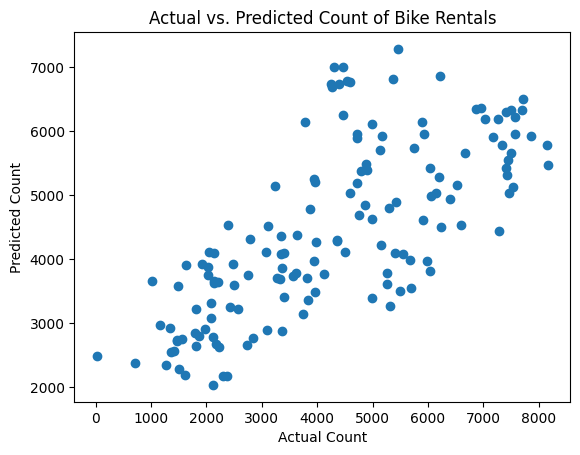

In [48]:
# Evaluasi performa model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Visualisasi hasil prediksi
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Count')
plt.ylabel('Predicted Count')
plt.title('Actual vs. Predicted Count of Bike Rentals')
plt.show()

Alur program di atas:

Mean Squared Error (MSE):
MSE mengukur rata-rata dari kuadrat selisih antara nilai aktual dan nilai prediksi. Semakin kecil MSE, semakin baik modelnya. Ini memberikan ide tentang seberapa baik model dapat memprediksi nilai aktual.

R-squared (R²):
R-squared mengukur seberapa besar variasi dalam variabel dependen yang dapat dijelaskan oleh variabel independen yang dimasukkan ke dalam model. Nilai R-squared berkisar antara 0 dan 1, dan semakin mendekati 1, semakin baik modelnya.

Visualisasi Scatter Plot:
Sebuah scatter plot dibuat untuk membandingkan nilai aktual (y_test) dengan nilai prediksi (y_pred). Setiap titik pada scatter plot mewakili satu observasi dalam data pengujian. Jika model melakukan prediksi yang sempurna, titik-titik akan membentuk garis diagonal.

Label dan Judul Plot:
Label sumbu x dan y diberikan sebagai "Actual Count" dan "Predicted Count" masing-masing. Judul plot adalah "Actual vs. Predicted Count of Bike Rentals".

Menampilkan Plot:
Fungsi plt.show() digunakan untuk menampilkan scatter plot tersebut.

Hasil visualisasi ini membantu dalam memahami sejauh mana model berhasil dalam memprediksi jumlah sewa sepeda berdasarkan fitur-fitur yang digunakan. Jika titik-titik cenderung mengikuti garis diagonal, itu menunjukkan bahwa model memberikan prediksi yang baik. Jika terdapat pola atau kesalahan sistematis, mungkin ada ruang untuk perbaikan model. Metrik evaluasi seperti MSE dan R-squared memberikan ukuran kuantitatif terkait kinerja model.

## Conclusion

- Kesimpulan pertanyaan 1: Pada cuaca seperti apa seseorang akan lebih sering menyewa sepeda untuk pergi bersepeda? 
Seseorang akan lebih sering menyewa sepeda di saat cuaca sedang cerah, sedikit awan, dan berawan sebagian.
- Kesimpulan pertanyaan 2: Bagaimana peforma penyewaan sepeda selama tahun 2012?
Penyewaan tertinggi pada tahun 2012 jatuh pada bulan ke-9 atau bulan September dan terendah pada bulan ke-1 atau bulan Januari.